# Notebook kelompok 4 kelas C2 angkatan 2020
1. Salsabila Kanaya (2001360)
2. Shafa Meira Wahyono (2007723)
3. Sri Nanda Ameliani (2008196)
4. Yosafat (2009929)

Pada tugas ini, kami menganalisa data penjualan video games pada tahun 1980-2016.

# Deskripsi Data

Dataset ini mengandung beberapa list video games dengan angka penjualan yang melebihi 100,000 unit. Dataset ini dihasilkan dari hasil scraping vgchartz.com

Atribut-atribut:
1. Rank - Ranking of sales
2. Name - Name video games
3. Platform - Platform of the games release (i.e. PC,PS4, etc.)
4. Year - Year of the game's release
5. Genre - Genre of the game
6. Publisher - Publisher of the game
7. NA_Sales - Sales in North America (in millions)
8. EU_Sales - Sales in Europe (in millions)
9. JP_Sales - Sales in Japan (in millions)
10. Other_Sales - Sales in the rest of the world (in millions)
11. Global_Sales - Total worldwide sales.

Terakhir diambil pada tahun 2016.
The script to scrape the data is available at https://github.com/GregorUT/vgchartzScrape.
It is based on BeautifulSoup using Python.
There are 16,598 records. 2 records were dropped due to incomplete information.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
 df = pd.read_csv("C:\\Users\\erric isnaini\\Documents\\Data covid\\vgsales.csv") #sesuaikan path
df.head(5000)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
4995,4997,Peppa Pig: The Game,Wii,2009.0,Misc,Pinnacle,0.00,0.35,0.00,0.03,0.38
4996,4998,God Eater 2: Rage Burst,PSV,2015.0,Role-Playing,Namco Bandai Games,0.00,0.01,0.37,0.00,0.38
4997,4999,Get Fit with Mel B,PS3,2010.0,Sports,Black Bean Games,0.15,0.17,0.00,0.07,0.38
4998,5000,The Cat in the Hat,GBA,2005.0,Platform,Jack of All Games,0.27,0.10,0.00,0.01,0.38


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Terdapat data yang kosong, yaitu atribut Year dan Genre. Oleh karena itu, dilakukan praproses berupa mengisikan data yang kosong.

# Eksplorasi Data

<AxesSubplot:xlabel='Platform', ylabel='count'>

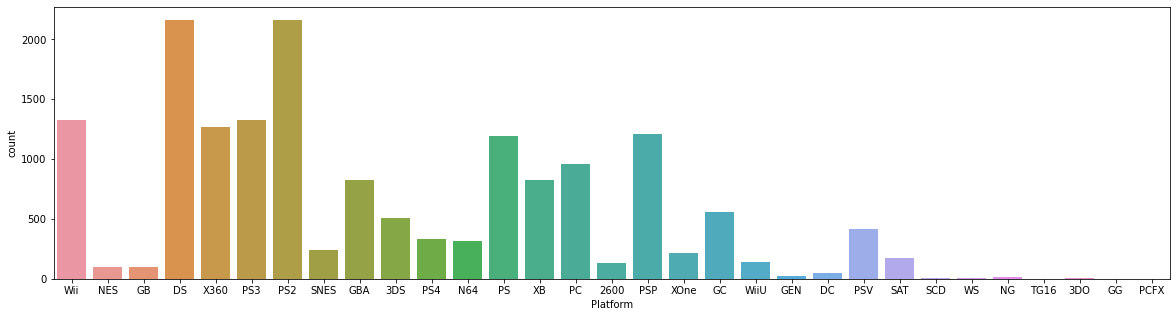

In [5]:
fig, ax = plt.subplots(figsize=(20, 5)) #atur ukuran chart
sns.countplot(ax=ax, x="Platform", data=df)

Terlihat bahwa data di atas memiliki beberapa tingkatan cukup ekstrem dengan detail platform DS dan PS2 mencapai titik penjualan tertinggi. Sedangkan, Platform SCD, WS, NG, TG16, 3DO, GG, dan PCFX memiliki data yang sedikit hingga mendekati 0 (tidak ada data).

In [6]:
df[['Global_Sales']].describe()

,Global_Sales
count,16598.000000
mean,0.537441
std,1.555028
min,0.010000
25%,0.060000
50%,0.170000
75%,0.470000
max,82.740000


Dari tabel di atas, dapat ditarik kesimpulan bahwa penjualan biasanya cukup rendah karena titik maksimum penjualan berada jauh  di atas quartil 3.

<AxesSubplot:xlabel='Year', ylabel='Count'>

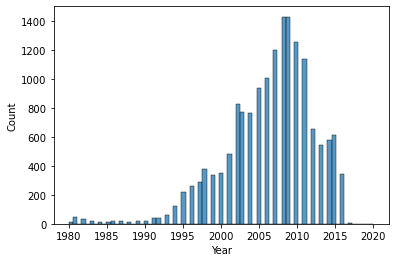

In [7]:
sns.histplot(data=df, x="Year")

Dilihat dari grafik di atas, penjualan video games potensi yang tinggi. Walaupun faktanya pada tahun setelah 2009 mengalami
penurunan, hal itu terjadi karena resesi ekonomi global.

In [8]:
df[(df.Year == 2009)][["Name", "Platform", "Publisher", "Global_Sales"]]

,Name,Platform,Publisher,Global_Sales
3,Wii Sports Resort,Wii,Nintendo,33.00
8,New Super Mario Bros. Wii,Wii,Nintendo,28.62
14,Wii Fit Plus,Wii,Nintendo,22.00
36,Call of Duty: Modern Warfare 2,X360,Activision,13.51
45,Pokemon HeartGold/Pokemon SoulSilver,DS,Nintendo,11.90
...,...,...,...,...
16540,15 Days,PC,DTP Entertainment,0.01
16551,Sweet Honey Coming,PS2,Kadokawa Shoten,0.01
16577,Damnation,PC,Codemasters,0.01
16586,Secret Files 2: Puritas Cordis,DS,Deep Silver,0.01


Tabel di atas merupakan pembuktian, bahwa pada tahun 2009 penjualan game mencapai titik tertinggi. 

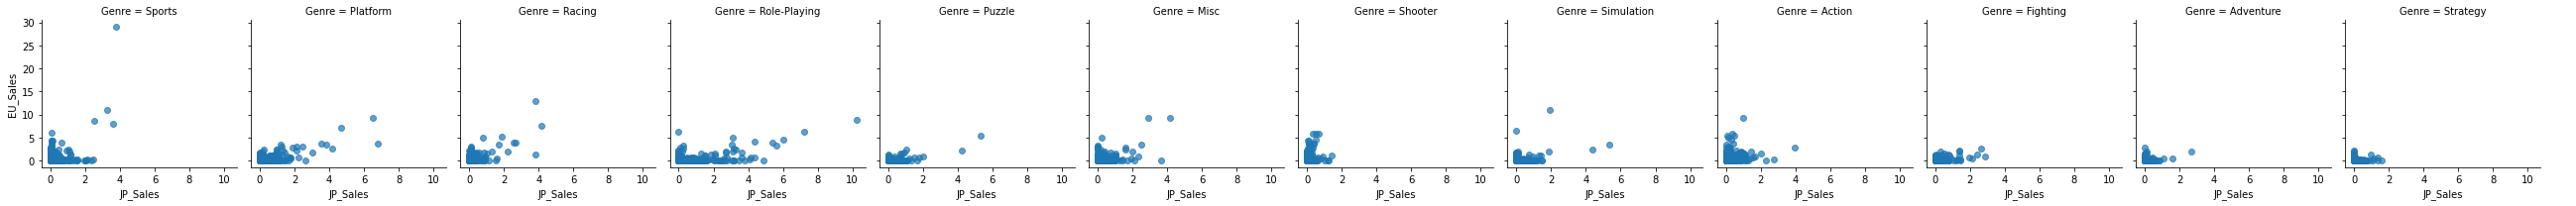

In [9]:
g = sns.FacetGrid(df, col="Genre")
g.map(plt.scatter, "JP_Sales", "EU_Sales", alpha=.7)
g.add_legend();

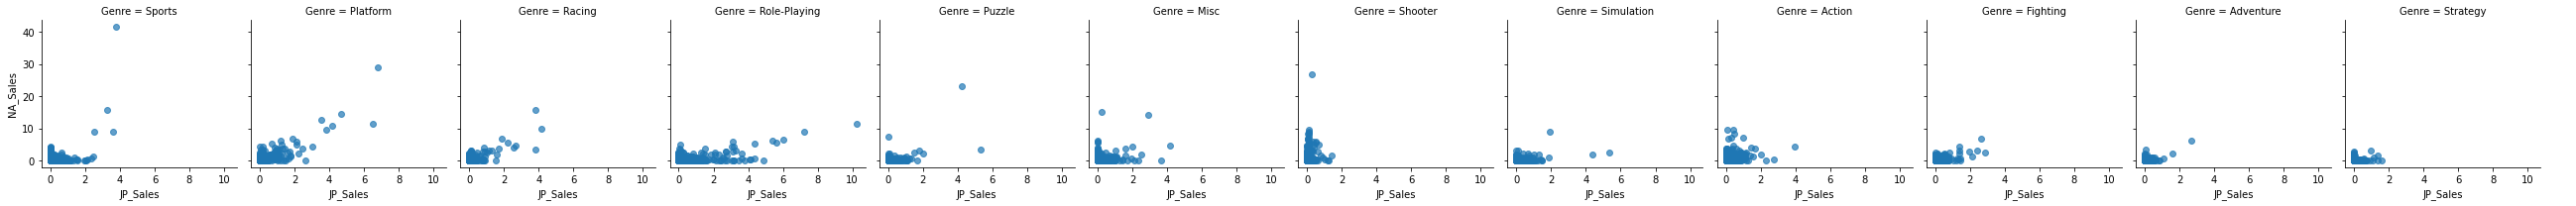

In [10]:
g = sns.FacetGrid(df, col="Genre")
g.map(plt.scatter, "JP_Sales", "NA_Sales", alpha=.7)
g.add_legend();

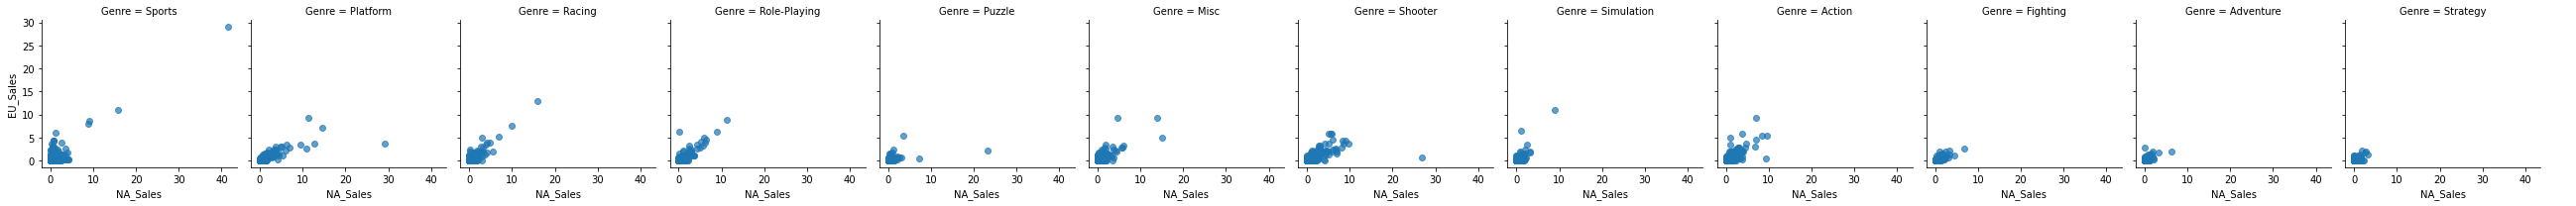

In [11]:
g = sns.FacetGrid(df, col="Genre")
g.map(plt.scatter, "NA_Sales", "EU_Sales", alpha=.7)
g.add_legend();

Dari 3 grafik scatterplot di atas, yaitu penjualan JP-EU, JP-NA, dan EU-NA hanya 1 skenario yang dapat digunakan, yaitu perbandingan penjualan antara EU-NA karena penjualan JP tidak akan seimbang, jika dibandingkan dengan EU ataupun NA. 

Dari grafik penjualan EU-NA, NA memiliki minat yang kuat pada genre sports dan racing, lalu EU dan NA memiliki minat yang sama-sama kuat pada genre sport.

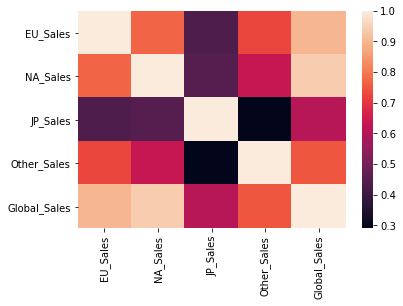

In [12]:
corr = df[["EU_Sales","NA_Sales","JP_Sales", "Other_Sales", "Global_Sales"]].corr()
ax = sns.heatmap(corr)

Korelasi antara atribut other_sales dan JP_sales menunjukkan bahwa kedua atribut tsb memiliki korelasi yang rendah (warna hitam) karena JP_Sales tidak memiliki pengaruh yg cukup besar pd atribut global_sales. Sedangkan pada atribut NA_Sales dan Global_Sales, memiliki korelasi yang cukup tinggi (warna krem muda) karena NA_Sales memiliki pengaruh yg cukup besar terhadap atribut Global_Sales. 

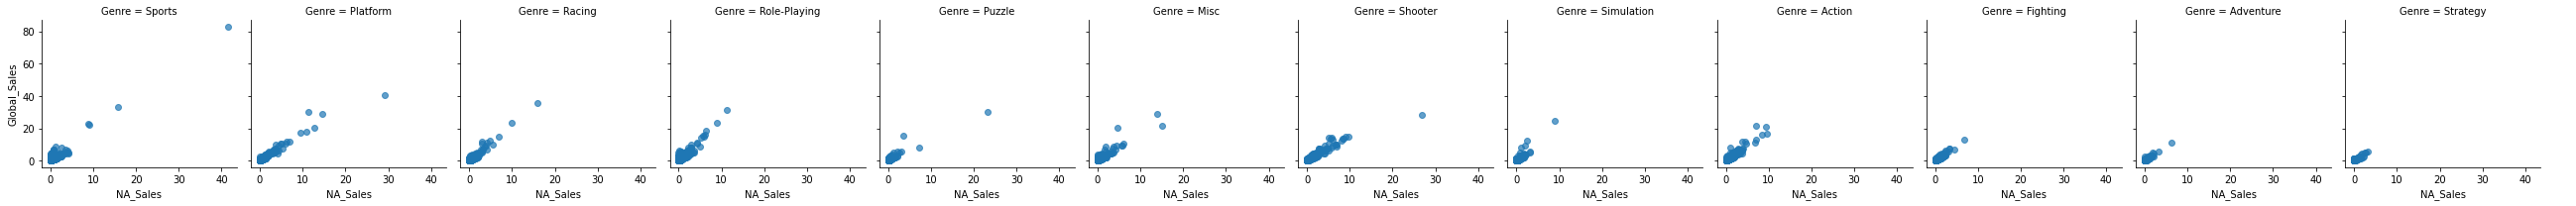

In [13]:
g = sns.FacetGrid(df, col="Genre")
g.map(plt.scatter, "NA_Sales", "Global_Sales", alpha=.7)
g.add_legend();

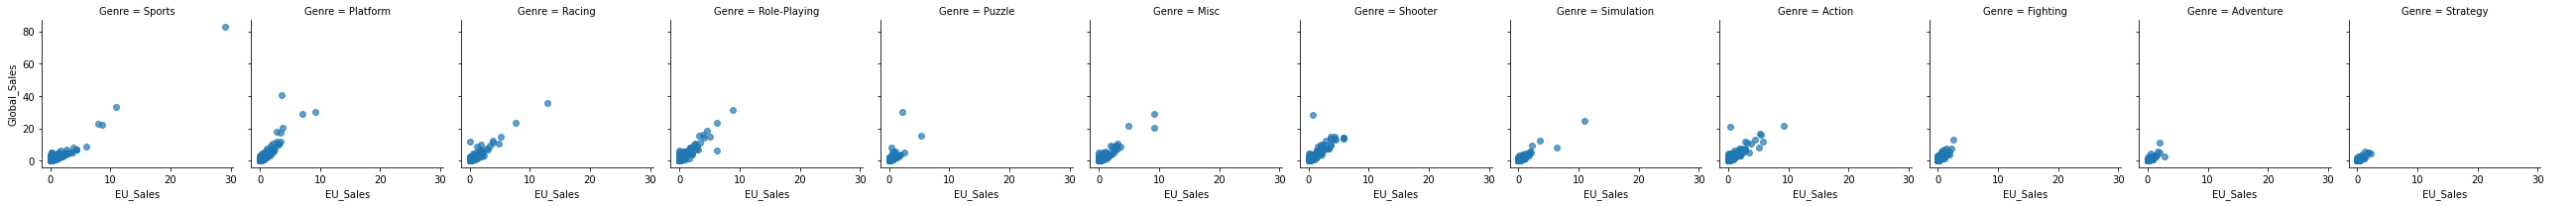

In [14]:
g = sns.FacetGrid(df, col="Genre")
g.map(plt.scatter, "EU_Sales", "Global_Sales", alpha=.7)
g.add_legend();

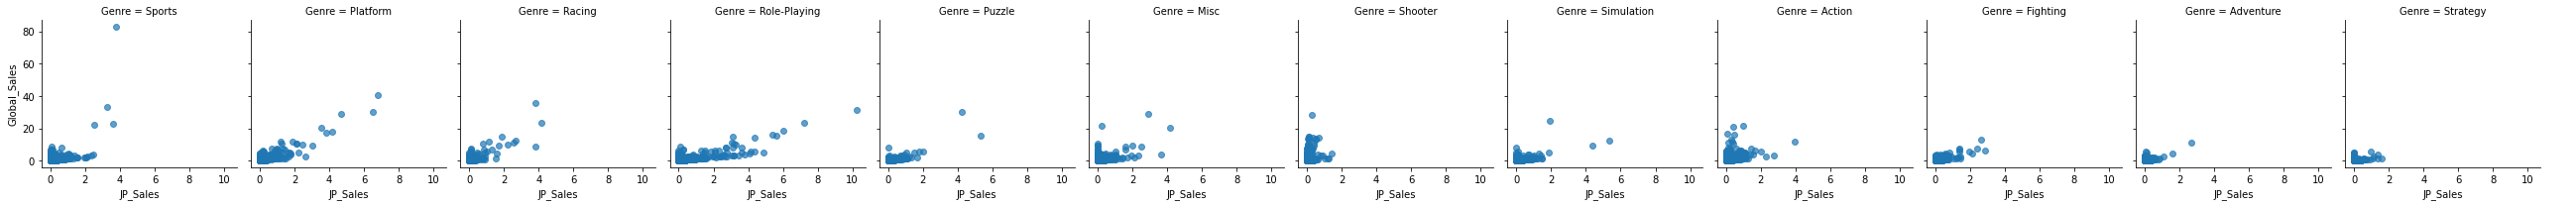

In [15]:
g = sns.FacetGrid(df, col="Genre")
g.map(plt.scatter, "JP_Sales", "Global_Sales", alpha=.7)
g.add_legend();

Dari 3 grafik scatterplot di atas, dapat disimpulkan bahwa NA_Sales memiliki kontribusi yang paling besar pada Global_Sales dibanding penjualan lainnya. Dibandingkan dengan 2 grafik yang lain, terlihat jelas perbedaan dari pola scatterplot-nya.